1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create python code explicitly demonstrating your explanation using numpy and scipy.stats 
In a theoretical simple linear regression model, we look at the relationship between two variables: the predictor (independent) variable XX and the outcome (dependent) variable Y. We utilize a linear equation to predict the value of Y given X.

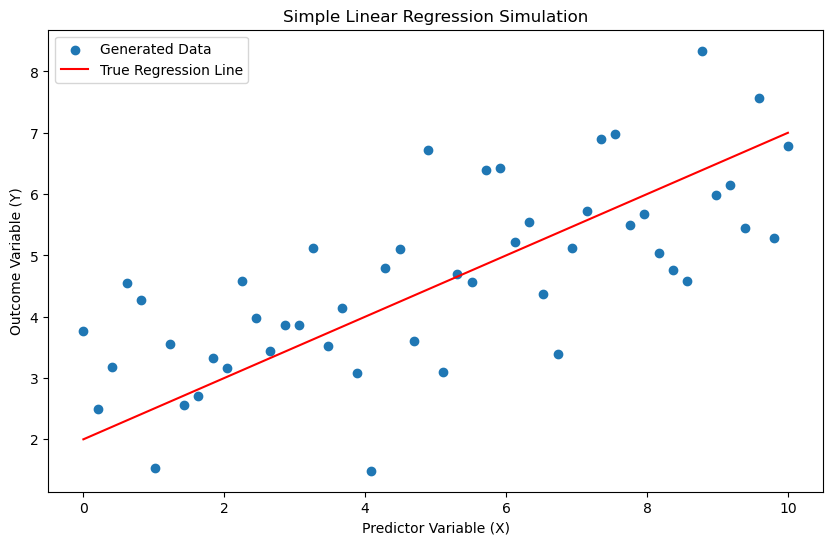

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set parameters for the simple linear regression model
np.random.seed(0)
beta_0 = 2.0  # Intercept
beta_1 = 0.5  # Slope
sigma = 1.0   # Standard deviation of the error term

# Generate predictor variable X
X = np.linspace(0, 10, 50)

# Generate error term epsilon as samples from a normal distribution
epsilon = norm.rvs(loc=0, scale=sigma, size=X.size)

# Calculate outcome variable Y as per the linear regression model
Y = beta_0 + beta_1 * X + epsilon

# Plot the generated data
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Generated Data')
plt.plot(X, beta_0 + beta_1 * X, color='red', label='True Regression Line')
plt.xlabel('Predictor Variable (X)')
plt.ylabel('Outcome Variable (Y)')
plt.title('Simple Linear Regression Simulation')
plt.legend()
plt.show('png')


2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     49.00
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           7.35e-09
Time:                        18:34:42   Log-Likelihood:                -73.192
No. Observations:                  50   AIC:                             150.4
Df Residuals:                      48   BIC:                             154.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8464      0.297      9.569      0.0

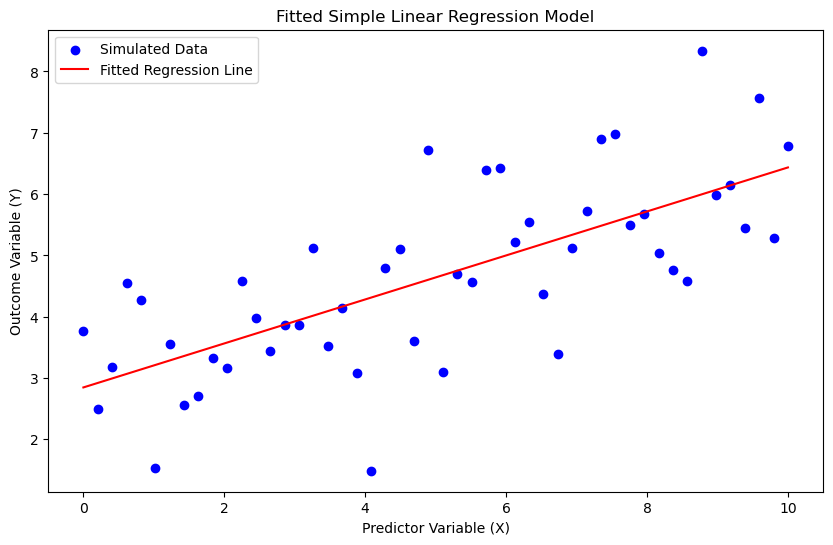

In [2]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(0)

# Define parameters for the simple linear regression model
beta_0 = 2.0  # Intercept
beta_1 = 0.5  # Slope
sigma = 1.0   # Standard deviation of the error term

# Generate predictor variable X
X = np.linspace(0, 10, 50)

# Generate error term epsilon and calculate outcome variable Y
epsilon = np.random.normal(loc=0, scale=sigma, size=X.size)
Y = beta_0 + beta_1 * X + epsilon

# Create a pandas DataFrame with the simulated data
data = pd.DataFrame({'X': X, 'Y': Y})

# Fit a simple linear regression model using statsmodels
model = smf.ols(formula='Y ~ X', data=data).fit()

# Display the summary of the model to view the fitted parameters and statistics
print(model.summary())

# Plot the data and the fitted regression line
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], label='Simulated Data', color='blue')
plt.plot(data['X'], model.predict(data), color='red', label='Fitted Regression Line')
plt.xlabel('Predictor Variable (X)')
plt.ylabel('Outcome Variable (Y)')
plt.title('Fitted Simple Linear Regression Model')
plt.legend()
plt.show('png')


3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words; but, hint though: simulation of random sampling variation

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     49.00
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           7.35e-09
Time:                        18:40:20   Log-Likelihood:                -73.192
No. Observations:                  50   AIC:                             150.4
Df Residuals:                      48   BIC:                             154.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8464      0.297      9.569      0.0

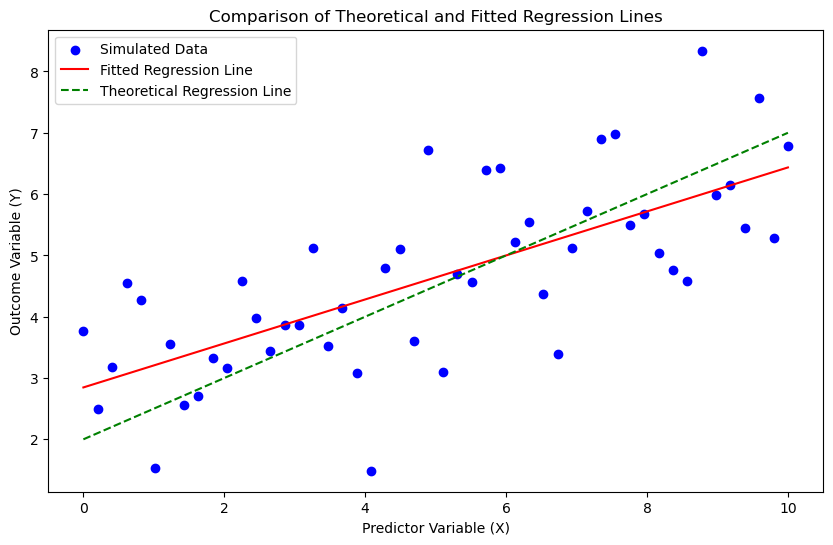

In [3]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(0)

# Define parameters for the simple linear regression model
beta_0 = 2.0  # Intercept
beta_1 = 0.5  # Slope
sigma = 1.0   # Standard deviation of the error term

# Generate predictor variable X
X = np.linspace(0, 10, 50)

# Generate error term epsilon and calculate outcome variable Y
epsilon = np.random.normal(loc=0, scale=sigma, size=X.size)
Y = beta_0 + beta_1 * X + epsilon

# Create a pandas DataFrame with the simulated data
data = pd.DataFrame({'X': X, 'Y': Y})

# Fit a simple linear regression model using statsmodels
model = smf.ols(formula='Y ~ X', data=data).fit()

# Display the summary of the model to view the fitted parameters and statistics
print(model.summary())

# Plot the data, the fitted regression line, and the theoretical line
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], label='Simulated Data', color='blue')
plt.plot(data['X'], model.predict(data), color='red', label='Fitted Regression Line')
plt.plot(data['X'], beta_0 + beta_1 * X, color='green', linestyle='--', label='Theoretical Regression Line')
plt.xlabel('Predictor Variable (X)')
plt.ylabel('Outcome Variable (Y)')
plt.title('Comparison of Theoretical and Fitted Regression Lines')
plt.legend()
plt.show('png')


Difference: 
Theoretical regression line (green and dashed): This line depicts the genuine relationship between X and Y using the parameters b0 = 2 and b1 = 0.5. This is the model we would expect if we could see Y without random sampling variations

Fitted Regression Line (Red, Solid): This line is based on observed sample data and incorporates unplanned changes in Y caused by the error factor epsilon. When we fit the model to the sampled data, the estimated parameters for the intercept and slope may deviate somewhat from the genuine values since the model tries to fit the actual sampled data rather than the theoretical line.

4. Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values) 
In a fitted simple linear regression model, the fitted_model.fittedvalues are the expected Y values based on the model's estimated parameters (intercept and slope) and observed X values. These predictions are based on the estimated coefficients listed in fitted_model.params or fitted_model.summary().tables[1].

9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the null hypothesis in the context of short wait times which are less than short_wait_limit values of 62, 64, 66. 

If the p_value < 0.05, then it provides evidence to reject the null hypothesis. If the p_value is > 0.05 then it provide no evidence for us to reject the null hypothesis. 

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


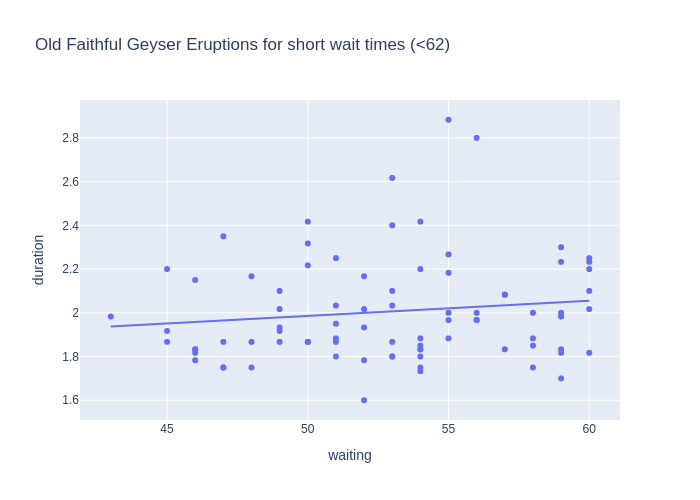

In [5]:
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns  # Import seaborn to load the dataset

# Load the 'old_faithful' dataset from seaborn
old_faithful = sns.load_dataset('geyser')  # Sometimes it's 'geyser' instead of 'old_faithful'

# Set the threshold for short wait times and filter the dataset
short_wait_limit = 62  # Change to 64 or 66 as needed
short_wait = old_faithful['waiting'] < short_wait_limit

# Fit the regression model and print the summary table
model = smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit()
print(model.summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration',
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")",
                 trendline='ols')

fig.show('png')


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


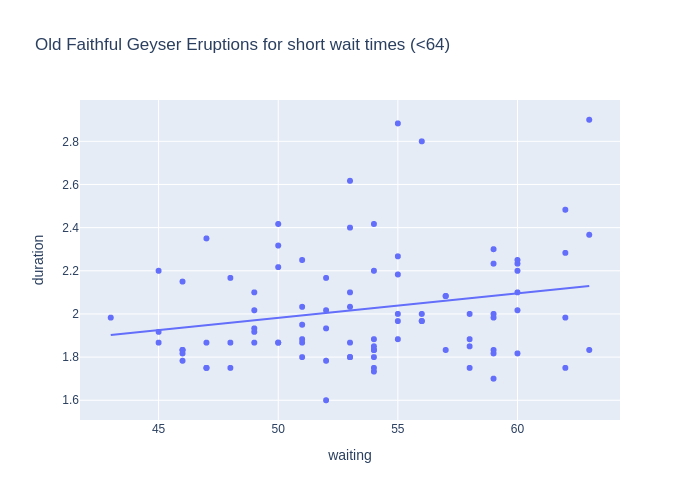

In [6]:
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns  # Import seaborn to load the dataset

# Load the 'old_faithful' dataset from seaborn
old_faithful = sns.load_dataset('geyser')  # Sometimes it's 'geyser' instead of 'old_faithful'

# Set the threshold for short wait times and filter the dataset
short_wait_limit = 64  # Change to 64 or 66 as needed
short_wait = old_faithful['waiting'] < short_wait_limit

# Fit the regression model and print the summary table
model = smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit()
print(model.summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration',
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")",
                 trendline='ols')

fig.show('png')


                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


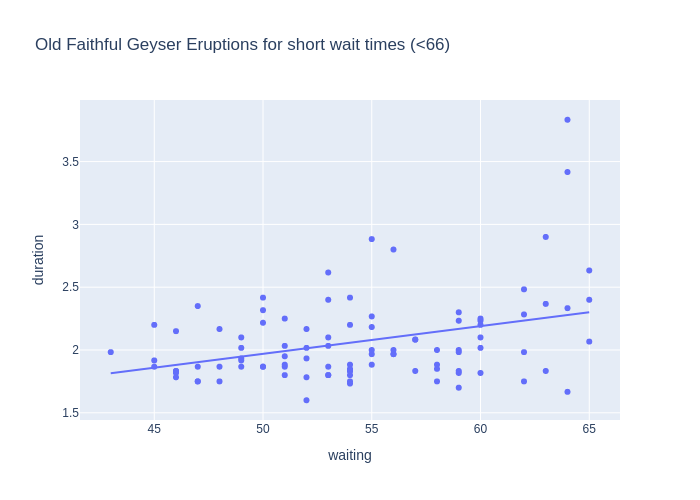

In [7]:
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns  # Import seaborn to load the dataset

# Load the 'old_faithful' dataset from seaborn
old_faithful = sns.load_dataset('geyser')  # Sometimes it's 'geyser' instead of 'old_faithful'

# Set the threshold for short wait times and filter the dataset
short_wait_limit = 66  # Change to 64 or 66 as needed
short_wait = old_faithful['waiting'] < short_wait_limit

# Fit the regression model and print the summary table
model = smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit()
print(model.summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration',
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")",
                 trendline='ols')

fig.show('png')


11. Since we've considered wait times of around <64 "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the Simple Linear Regression model specification using an indicator variable of the wait time length

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


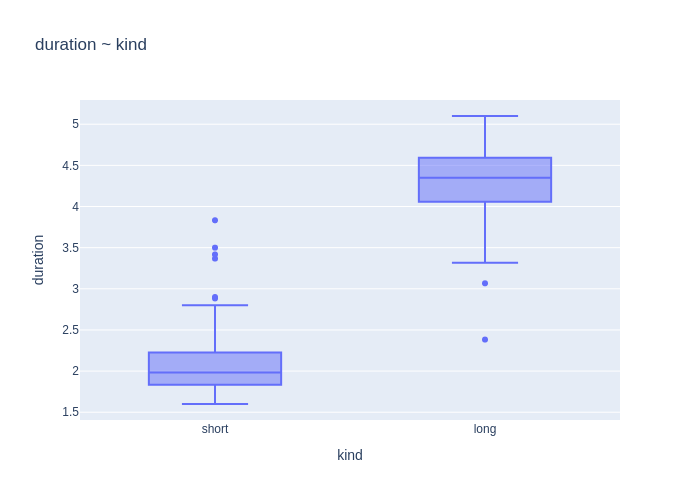

In [8]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show('png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

BIG PICTURE DIFFERENCE: 
In the previous model, the data was split into distinct datasets for shor and long waits.
The new model with a parameter captures the impact of the wait time. This provide direct comparison within the same one model. Evidence against the null hypothesis means that there is a difference between short and long wait time in the duration.

CHATBOT: https://chatgpt.com/share/672d3eef-5c94-800e-be3d-ceb660e77c04